[*********************100%***********************]  1 of 1 completed


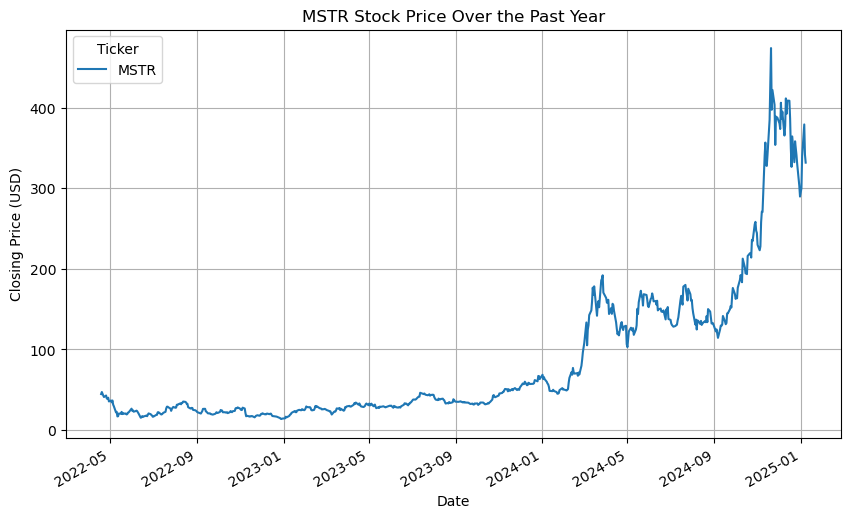

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the stock ticker and time range
ticker = "MSTR"
end_date = datetime.now()
start_date = end_date - timedelta(days=1000)

# Fetch the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data is fetched successfully
if data.empty:
    print(f"No data found for {ticker} in the past year.")
else:
    # Plot the closing price
    data["Close"].plot(figsize=(10, 6), title=f"{ticker} Stock Price Over the Past Year", legend=True)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid()
    plt.show()


[*********************100%***********************]  1 of 1 completed


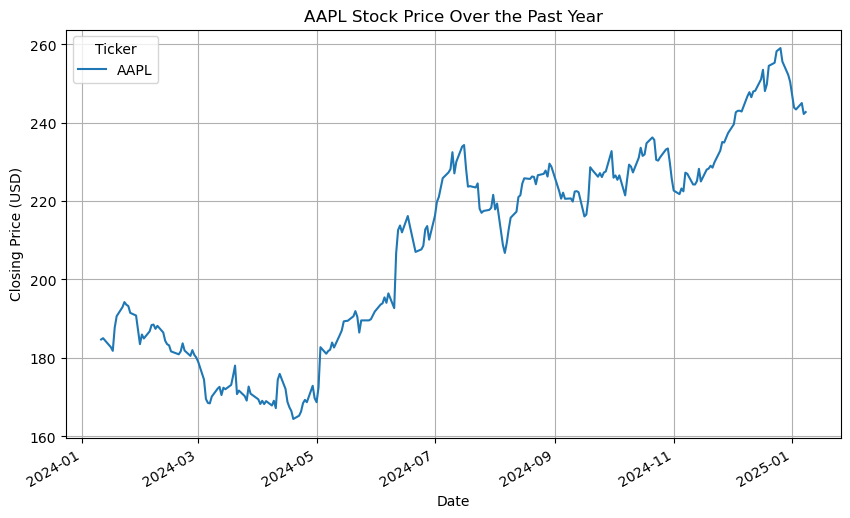

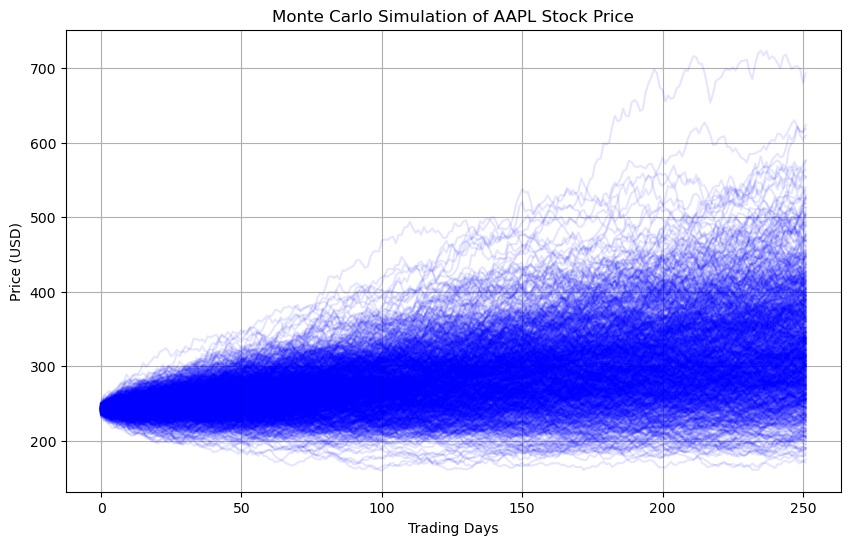

In [34]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Define the stock ticker and time range
ticker = "AAPL"
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data is fetched successfully
if data.empty:
    print(f"No data found for {ticker} in the past year.")
else:
    # Plot the closing price
    data["Close"].plot(figsize=(10, 6), title=f"{ticker} Stock Price Over the Past Year", legend=True)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid()
    plt.show()

    # Monte Carlo Simulation
    closing_prices = data["Close"].values
    log_returns = np.log(closing_prices[1:] / closing_prices[:-1])
    mean_return = np.mean(log_returns)
    std_dev = np.std(log_returns)

    # Simulation parameters
    simulations = 1000
    time_horizon = 252  # Number of trading days in a year

    # Initialize simulation matrix
    simulation_matrix = np.zeros((simulations, time_horizon))
    starting_price = closing_prices[-1]

    for i in range(simulations):
        daily_returns = np.random.normal(mean_return, std_dev, time_horizon)
        price_path = starting_price * np.exp(np.cumsum(daily_returns))
        simulation_matrix[i, :] = price_path

    # Plot the simulation results
    plt.figure(figsize=(10, 6))
    plt.plot(simulation_matrix.T, alpha=0.1, color="blue")
    plt.title(f"Monte Carlo Simulation of {ticker} Stock Price")
    plt.xlabel("Trading Days")
    plt.ylabel("Price (USD)")
    plt.grid()
    plt.show()



[*********************100%***********************]  1 of 1 completed


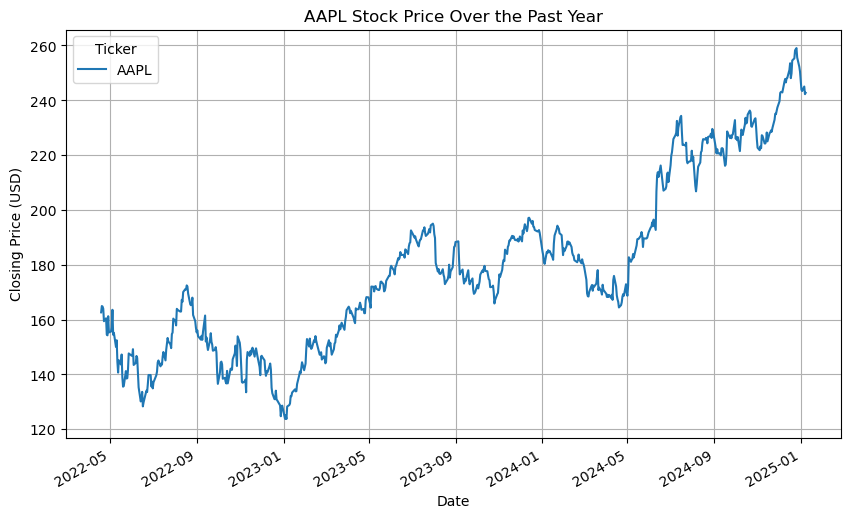

Suggested stock price for AAPL in a year: $291.54


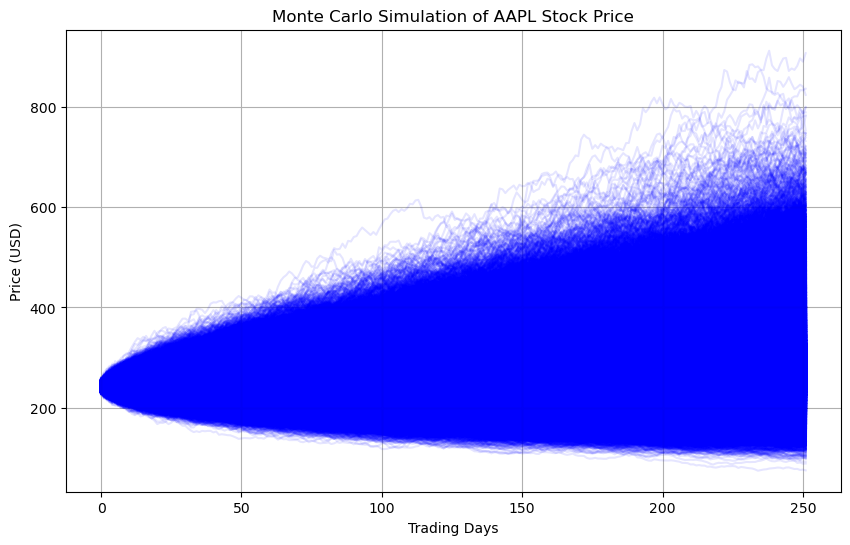

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Define the stock ticker and time range
ticker = "AAPL"
end_date = datetime.now()
start_date = end_date - timedelta(days=1000)

# Fetch the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data is fetched successfully
if data.empty:
    print(f"No data found for {ticker} in the past year.")
else:
    # Plot the closing price
    data["Close"].plot(figsize=(10, 6), title=f"{ticker} Stock Price Over the Past Year", legend=True)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid()
    plt.show()

    # Monte Carlo Simulation
    closing_prices = data["Close"].values
    log_returns = np.log(closing_prices[1:] / closing_prices[:-1])
    mean_return = np.mean(log_returns)
    std_dev = np.std(log_returns)

    # Simulation parameters
    simulations = 100000
    time_horizon = 252  # Number of trading days in a year

    # Initialize simulation matrix
    simulation_matrix = np.zeros((simulations, time_horizon))
    starting_price = closing_prices[-1]

    for i in range(simulations):
        daily_returns = np.random.normal(mean_return, std_dev, time_horizon)
        price_path = starting_price * np.exp(np.cumsum(daily_returns))
        simulation_matrix[i, :] = price_path

    # Extract the final prices after a year
    final_prices = simulation_matrix[:, -1]

    # Calculate the suggested stock price (mean of final prices)
    suggested_price = np.mean(final_prices)
    print(f"Suggested stock price for {ticker} in a year: ${suggested_price:.2f}")

    # Plot the simulation results
    plt.figure(figsize=(10, 6))
    plt.plot(simulation_matrix.T, alpha=0.1, color="blue")
    plt.title(f"Monte Carlo Simulation of {ticker} Stock Price")
    plt.xlabel("Trading Days")
    plt.ylabel("Price (USD)")
    plt.grid()
    plt.show()
